# 3. Búsqueda #
Profesor: Eric S. Tellez <eric.tellez@infotec.mx>


## Notas preliminares.
- Entienda, implemente y pruebe algoritmos de búsqueda, teniendo como guía las lecturas y videos
- Revise el documento. Si hay dudas o comentarios favor hagamelo saber y se harán las aclaraciones y correcciones necesarias.


## Introducción

En esta unidad se aborda la búsqueda en arreglos ordenados, y abusando del término, muchas veces les llamaremos listas ordenadas. Entendemos  como lista ordenada un arreglo
$A[1,n] = a_1,a_2,\cdots,a_n$, el cual cumple con la propiedad $a_i \leq a_{i+1}$ para todo $1 \leq i \leq n-1$. Recuerde que a lo largo de este curso, esta será nuestra representación para conjuntos. Es muy común encontrar en la literatura,
y en este curso, que se aborde el tema con un modelo de costo basado en comparaciones, esto es, cada comparación $\le$ provoca costo constante $O(1)$.
Esto se hace porque la  comparación es un excelente factorizador de las operaciones adicionales en los algoritmos de búsqueda; esto debería quedar claro una vez que se comprendan los algoritmos.

Utilizaremos como base el artículo [@Bentley76], que es de lectura forzosa. Nos apoyaremos en una serie de lecturas adicionales para comprender y madurar el concepto.

Se realizará una práctica, en la cual deberá crear un índice invertido. El código básico se encontrará a lo largo de este notebook, también los datos para inicializarlo.


## Lectura y comprensión

- El artículo sobre búsqueda no acotada, como representativo sobre búsqueda adaptativa [@Bentley76].
- Cap. 12 de [@Sedgewick98], en partícular Sec. 12.3 y 12.4.
- Cap. 6 de [@Knuth98], en partícular Sec. 6.1 y 6.2.
- El artículo sobre búsqueda adaptativa secuencial [@Bentley85].
- Recuerde la referencia básica para la notación y conceptos es [@Cormen01].

## Actividad 0 [sin entrega]

Realizar las actividades de lectura y comprensión, apoyosé en el video de esta unidad. De preferencia realice los ejercicios de las secciones relacionadas.
  

## Actividad 1 [con reporte]

Realice y reporte el siguiente experimento:
 
 - Use el archivo `listas-posteo-100.json`, contiene las 100 listas de posteo más frecuentes, se encuentran en formato JSON.
 - Utilice las listas (sin el término asociado).
 - Los usuarios de Julia deberán asegurar que los tipos de los arreglos es `Int` y no `Any` para asegurar la velocidad adecuada
 - Seleccione 1000 identificadores de documentos al azar, entre $1$ y $n$, recuerde que $n=50,000$.
 - Grafique el tiempo promedio de _buscar_ los 1000 identificadores en todas las listas (un solo número que represente las $100\times 1000$ búsquedas). Nota: lo que determinará al buscar es la _posición de inserción_ que se define como el lugar donde debería estar el identificador si se encontrara en la lista.
 - Los algoritmos que caracterizará son los siguientes (nombres con referencia a [@Bentley76]):
      - Búsqueda binaria acotada
      - Búsqueda secuencial $B_0$
      - Búsqueda no acotada $B_1$
      - Búsqueda no acotada $B_2$

   - *Importante: Tal vez deba repetir varias veces cada búsqueda si los tiempos son muy pequeños.*
 - Bosqueje en pseudo-código la implementación de la búsqueda casí optima $B_k$

  
### Entregable
El reporte deberá ser en formato notebook y el PDF del mismo notebook. El notebook debe contener las implementaciones de los algoritmos solicitados. Recuerde que el reporte debe llevar claramente su nombre, debe incluir una introducción, la explicación de los experimentos realizados, las observaciones, conclusiones y bibliografía.

Nota: En las implementaciones podrá usar comparación $<, \leq$, o incluso $cmp \rightarrow \{-1, 0, 1\}$, teniendo en cuenta que $cmp$ es común en lenguajes modernos, solo debe indicarlo.


## Actividad 2 [sin entrega]
Revisar el notebook `crear-indice-invertido.ipynb` para los detalles de como se generó la lista de posteo. Usted puede crear nuevas listas de posteo si lo desea usando los conjuntos de datos disponibles (listados en dicho notebook), y a su vez utilizarlas en las actividades de este Unidad. Solo deberá indicarlo; recuerde que los números de documentos y tamaño de vocabulario cambiarán.


## Leyendo las listas de posteo

Usted no necesita generar las listas de posteo, solo leer las que se le han proporcionado en el archivo `listas-posteo-100.json` que corresponden a las 100 listas de posteo más pobladas (100 terminos más usados en el conjunto de datos).
En el archivo `listas-posteo-100.json` , cada linea un JSON valido, donde se tiene el término y la lista de posteo.

**Al final de este notebook se muestra como se leen las listas de posteo desde Julia**


## Referencias
- [@Knuth98]: Donald E. Knuth. 1998. The Art of Computer Programming, Volume 3: (2nd Ed.) Sorting and Searching. Addison Wesley Longman Publishing Co., Inc., Redwood City, CA, USA.
- [@Bentley76]: Jon Louis Bentley, Andrew Chi-Chih Yao. An almost optimal algorithm for unbounded searching. Information Processing Letters, Volume 5, Issue 3, 1976, Pages 82-87. ISSN 0020-0190. https://doi.org/10.1016/0020-0190(76)90071-5.
- [@Bentley85]: Bentley, J.L., McGeoch, C.C. Amortized analyses of self-organizing sequential search heuristics. (1985) Communications of the ACM, 28 (4), pp. 404-411. Doi: 10.1145/3341.3349. 
- [@Cormen01]: Cormen et. al. Introduction to algorithms. MIT press 2001. 2nd edition.
- [@Sedgewick98]: Robert Sedgewick. Algorithms in C++ - Parts 1-4: Fundamentals, Data Structures, Sorting, Searching. Addison-Wesley-Longman, 1998. 3rd Edition.



##############################
# Inicialización del ambiente de trabajo

In [1]:
using Pkg
Pkg.activate(".")
# Pkg.instantiate() # solo la primera vez se debe correr
using JSON3, Plots

  Activating environment at `~/MCDI2021-ALGO-IR/3. Algoritmos de búsqueda en listas ordenadas/Project.toml`


### Lectura y acceso a las listas de posteo

_url -> 41328, amlo -> 21435, @lopezobrador_ -> 14714, _num -> 6774, presidente -> 4380, mexico -> 3985, #elecciones_num -> 3916, pena -> 3610, #amlo -> 3382, @epn -> 3202, gobierno -> 3109, reunion -> 3080, nieto -> 2894, lopez -> 2282, obrador -> 2222, triunfo -> 1995, trump -> 1884, nacional -> 1824, #mexico -> 1483, electo -> 1444, @inemexico -> 1387, pompeo -> 1338, manuel -> 1309, equipo -> 1296, transicion -> 1270, andres -> 1179, seguridad -> 1137, gabinete -> 1131, palacio -> 1112, virtual -> 1066, #transicion_num -> 1057, morena -> 1050, estado -> 1044, encuentro -> 1033, va -> 1027, presidencial -> 1026, eleccion -> 1021, empresarios -> 980, anos -> 960, #envivo -> 959, elecciones -> 921, campana -> 899, @ricardoanayac -> 884, _num% -> 873, ➡ -> 864, votos -> 861, dijo -> 860, electoral -> 842, durante -> 833, victoria -> 824, video -> 808, hoy -> 777, plan -> 763, proximo -> 749, secretario -> 747, @accionnacional -> 735, corrupcion -> 732, politica -> 728, gobernadores -> 

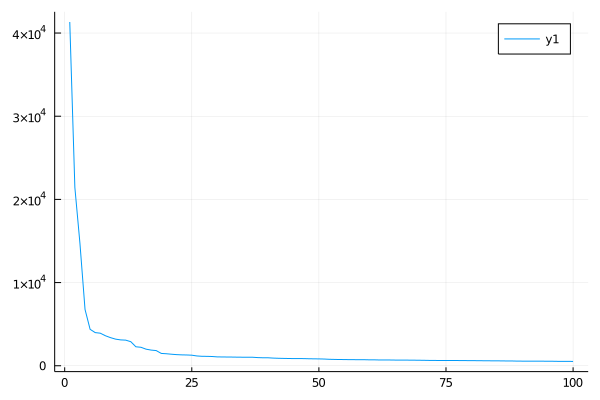

In [2]:
L = [JSON3.read(line, Tuple{String, Vector{Int32}}) for line in eachline("listas-posteo-100.json")]

for (token, list) in L
    print(token, " -> ", length(list), ", ")
end
println("<end>")

plot([length(p[end]) for p in L])